In [3]:
import copy
from datetime import date, timedelta, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
import csv
from sklearn import tree
from itertools import *
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, roc_auc_score
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import savgol_filter, argrelextrema
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
import sweetviz as sv

In [1]:
import dabl

In [5]:
df_train = pd.read_csv('train.csv').set_index('Id')
df_test = pd.read_csv('test.csv').set_index('Id')

In [9]:
df_clean = dabl.clean(df_train, verbose=1)

Detected feature types:
continuous      19
dirty_float      0
low_card_int     6
categorical     42
date             0
free_string      0
useless         13
dtype: int64


In [10]:
dabl.detect_types(df_clean)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
MSSubClass,False,False,True,False,False,False,False
MSZoning,False,False,False,True,False,False,False
LotFrontage,True,False,False,False,False,False,False
LotArea,True,False,False,False,False,False,False
Alley,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
MoSold,False,False,True,False,False,False,False
YrSold,False,False,False,True,False,False,False
SaleType,False,False,False,True,False,False,False
SaleCondition,False,False,False,True,False,False,False


Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 44 categorical features


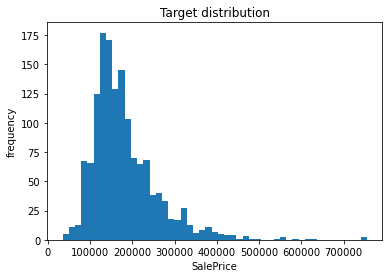

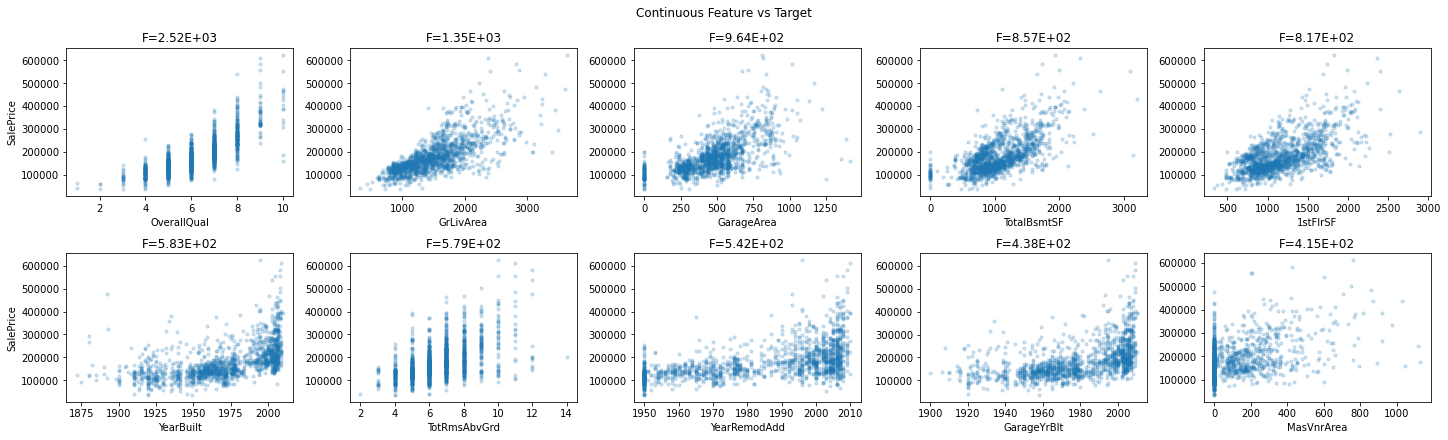

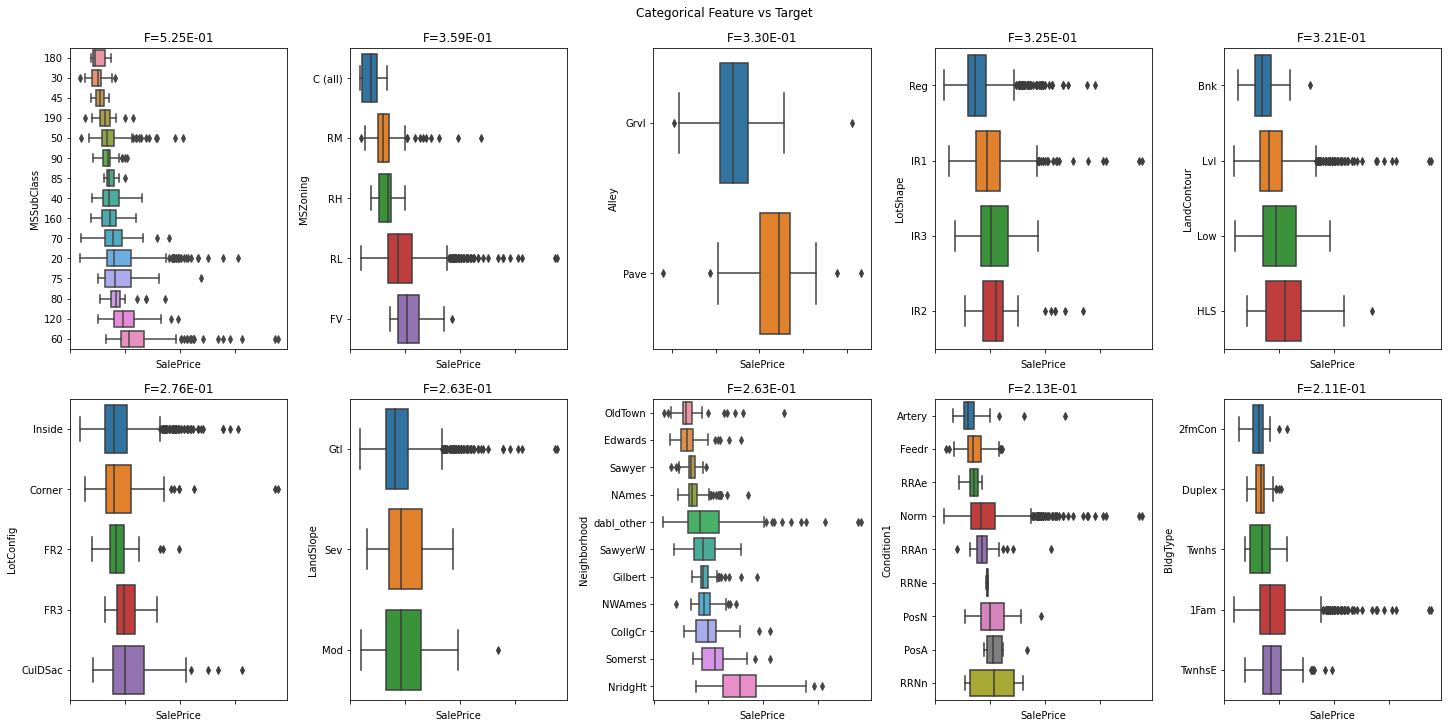

In [11]:
dabl.plot(df_clean, 'SalePrice')

In [7]:
df_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,NaN,NaN,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,NaN,NaN,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,NaN,NaN,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,NaN,NaN,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,84,0,0,NaN,NaN,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,NaN,Reg,Lvl,Inside,Gtl,Gilbert,...,40,0,0,NaN,NaN,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,NaN,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,MnPrv,NaN,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,NaN,Reg,Lvl,Inside,Gtl,Crawfor,...,60,0,0,GdPrv,Shed,5,2010,WD,Normal,266500


In [4]:
report = sv.analyze(df_train)
report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [115]:
# 
df_train.MSZoning = df_train.MSZoning.map({'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4})

df_train.LotFrontage[df_train.LotFrontage.isna()] = np.sqrt(df_train.LotArea[df_train.LotFrontage.isna()])

df_train.Street = df_train.Street.map({'Pave':0, 'Grvl':1})

df_train.Alley = df_train.Alley.map({'Pave':2, 'Grvl':1, np.nan:0})

df_train.LotShape = df_train.LotShape.map({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})

df_train.LandContour = df_train.LandContour.map({'Lvl':0, 'Bnk':1, 'Low':2, 'HLS':3})

df_train.Utilities = df_train.Utilities.map({'AllPub':0, 'NoSeWa':1})

df_train.LotConfig = df_train.LotConfig.map({'Inside':0, 'FR2':1, 'Corner':2, 'CulDSac':3, 'FR3':4})

df_train.LandSlope = df_train.LandSlope.map({'Gtl':0, 'Mod':1, 'Sev':2})

df_train.Neighborhood = df_train.Neighborhood.map({
    'CollgCr':0, 'Veenker':1, 'Crawfor':2, 'NoRidge':3, 'Mitchel':4, 'Somerst':5,
       'NWAmes':6, 'OldTown':7, 'BrkSide':8, 'Sawyer':9, 'NridgHt':10, 'NAmes':11,
       'SawyerW':12, 'IDOTRR':13, 'MeadowV':14, 'Edwards':15, 'Timber':16, 'Gilbert':17,
       'StoneBr':18, 'ClearCr':19, 'NPkVill':20, 'Blmngtn':21, 'BrDale':22, 'SWISU':23,
       'Blueste':24})

df_train.Condition1 = df_train.Condition1.map({
    'Norm':0, 'Feedr':1, 'PosN':2, 'Artery':3, 'RRAe':4, 'RRNn':5,
       'RRAn':6, 'PosA':7, 'RRNe':8})

df_train.Condition2 = df_train.Condition2.map({
    'Norm':0, 'Artery':1, 'RRNn':2, 'Feedr':3, 'PosN':4, 'PosA':5, 'RRAn':6, 'RRAe':7})

df_train.BldgType = df_train.BldgType.map({
    '1Fam':0, '2fmCon':1, 'Duplex':2, 'TwnhsE':3, 'Twnhs':4})

df_train.HouseStyle = df_train.HouseStyle.map({
    '2Story':0, '1Story':1, '1.5Fin':2, '1.5Unf':3, 'SFoyer':4, 'SLvl':5, '2.5Unf':6, '2.5Fin':7})

df_train.RoofStyle = df_train.RoofStyle.map({'Gable':0, 'Hip':1, 'Gambrel':2, 'Mansard':3, 'Flat':4, 'Shed':5})


df_train.RoofMatl = df_train.RoofMatl.map({
    'CompShg':0, 'WdShngl':1, 'Metal':2, 'WdShake':3, 'Membran':4, 'Tar&Grv':5, 'Roll':6, 'ClyTile':7})

In [196]:
def make_df(df):
    df.LotFrontage[df.LotFrontage.isna()] = np.sqrt(df.LotArea[df.LotFrontage.isna()])

    df.GarageYrBlt.fillna(0, inplace=True)
    df['GarageYrBlt_grouped'] = np.digitize(df.GarageYrBlt, [-1, 1899] + list(np.arange(1910, 2011, 10)), right=True)

    df.Alley.fillna('None', inplace=True)
    
    df.MSZoning.fillna('RL', inplace=True)
    df.Utilities.fillna('AllPub', inplace=True)
    df.Exterior1st.fillna('VinylSd', inplace=True)
    df.Exterior2nd.fillna('VinylSd', inplace=True)
    df.BsmtFinSF1.fillna(0, inplace=True)
    df.BsmtFinSF2.fillna(0, inplace=True)
    df.TotalBsmtSF.fillna(0, inplace=True)
    df.BsmtFullBath.fillna(0, inplace=True)
    df.BsmtHalfBath.fillna(0, inplace=True)
    df.SaleType.fillna('WD', inplace=True)
    df.Functional.fillna('Typ', inplace=True)
    df.KitchenQual.fillna('TA', inplace=True)
    df.GarageCars.fillna(2, inplace=True)
    df.GarageArea.fillna(519.042857, inplace=True)
    df.BsmtUnfSF.fillna(0, inplace=True)
    
        
    df.MasVnrType.fillna('None', inplace=True)
    df.BsmtQual.fillna('None', inplace=True)
    df.BsmtCond.fillna('None', inplace=True)
    df.BsmtExposure.fillna('None', inplace=True)
    df.BsmtFinType1.fillna('None', inplace=True)
    df.Electrical.fillna('SBrkr', inplace=True)
    df.BsmtFinType2.fillna('None', inplace=True)
    df.FireplaceQu.fillna('None', inplace=True)
    df.GarageType.fillna('None', inplace=True)
    df.GarageFinish.fillna('None', inplace=True)
    df.GarageQual.fillna('None', inplace=True)
    df.GarageCond.fillna('None', inplace=True)
    df.PoolQC.fillna('None', inplace=True)
    df.Fence.fillna('None', inplace=True)
    df.MiscFeature.fillna('None', inplace=True)
#     df.GarageYrBlt


    df.MasVnrArea[((df.MasVnrArea.isna()) & (df['OverallQual'] == 6))] = 103.354839
    df.MasVnrArea[((df.MasVnrArea.isna()) & (df['OverallQual'] == 7))] = 105.707937
    df.MasVnrArea[((df.MasVnrArea.isna()) & (df['OverallQual'] == 8))] = 211.538922
    df.MasVnrArea[((df.MasVnrArea.isna()) & (df['OverallQual'] == 10))] = 539.235294
    
    return df

In [264]:
df_train = pd.read_csv('train.csv').set_index('Id')
df_test = pd.read_csv('test.csv').set_index('Id')

df_train = make_df(df_train)
df_test = make_df(df_test)

In [265]:
for col in df_train.select_dtypes('object').columns:
    original_train = df_train[col].unique()
    original_test = df_test[col].unique()

    original = list(set(original_train) | set(original_test))

    df_train.replace(original, np.arange(len(original)), inplace=True)
    df_test.replace(original, np.arange(len(original)), inplace=True)

In [266]:
columns_to_drop = []
for col in df_train.columns:
    if abs(np.corrcoef(df_train.SalePrice, df_train[col])[0][1]) > 0.2:
        columns_to_drop.append(col)
columns_to_drop

['LotFrontage',
 'LotArea',
 'LotShape',
 'Neighborhood',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'SaleType',
 'SalePrice',
 'GarageYrBlt_grouped']

In [273]:
X_train = df_train.drop(['SalePrice', 'GarageYrBlt'], axis=1)
y_train = df_train.SalePrice

X_test = df_test.drop(['GarageYrBlt'], axis=1)

X_train1, X_validation, y_train1, y_validation = train_test_split(
    X_train, y_train, test_size=0.33, random_state=0)

In [270]:
clf = RandomForestRegressor(random_state=None, n_estimators=1000, max_depth=10)
clf.fit(X_train1, y_train1)
clf.predict(X_validation)
clf.score(X_validation, y_validation), clf.score(X_train1, y_train1)

(0.5786284628856594, 0.8560715417799044)

In [229]:
n_estimators=list(range(1100,1301,100))
max_depth = list(range(11,15,1))
hyper={'n_estimators':n_estimators,'max_depth':max_depth}

gd=GridSearchCV(estimator=RandomForestRegressor(),param_grid=hyper,verbose=True,n_jobs=-1)

gd.fit(X_train1,y_train1)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


0.8407558043604068
RandomForestRegressor(max_depth=10, n_estimators=1000)


In [314]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.decomposition import PCA

knn = KNeighborsClassifier(n_neighbors=10)
svr = SVR(C=1.0, epsilon=0.5)

nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=10, random_state=42))
nca.fit(X_train1, y_train1)

pca = make_pipeline(StandardScaler(),
                    PCA(n_components=10, random_state=42))
pca.fit(X_train1, y_train1)

# knn.fit(nca.transform(X_train1), y_train1)
# svr.fit(nca.transform(X_train1), y_train1)


knn.fit(pca.transform(X_train1), y_train1)
svr.fit(pca.transform(X_train1), y_train1)

# print(knn.score(nca.transform(X_validation), y_validation), knn.score(nca.transform(X_train1), y_train1))
# print(svr.score(nca.transform(X_validation), y_validation), svr.score(nca.transform(X_train1), y_train1))

print(knn.score(pca.transform(X_validation), y_validation), knn.score(pca.transform(X_train1), y_train1))
print(svr.score(pca.transform(X_validation), y_validation), svr.score(pca.transform(X_train1), y_train1))


# algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
# clf = SVR(kernel='poly')
# clf.fit(X_train1, y_train1)
# clf.predict(X_validation)
# clf.score(X_validation, y_validation), clf.score(X_train1, y_train1)


# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.5))
# regr.fit(X_train1, y_train1)
# regr.score(X_validation, y_validation), regr.score(X_train1, y_train1)

0.002074688796680498 0.0950920245398773
-0.03936738839325371 -0.048983056981230844


In [292]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']

In [271]:
clf = xgb.XGBRegressor()
clf.fit(X_train1, y_train1,
        eval_set=[(X_train1, y_train1), (X_validation, y_validation)], eval_metric='rmsle', verbose=False)
clf.score(X_validation, y_validation), clf.score(X_train1, y_train1)

(0.5947616048054696, 0.9612831190147877)

In [215]:
len(df_train.columns)

81

In [259]:
n_estimators=list(range(100,1001,200))
learn_rate=[0.01, 0.05, 0.1]
max_depth = list(range(5,11,1))
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate, 'max_depth':max_depth}

gd=GridSearchCV(estimator=xgb.XGBRegressor(),param_grid=hyper,verbose=True,n_jobs=-1)

gd.fit(X_train1,y_train1,
      eval_set=[(X_train1, y_train1), (X_validation, y_validation)], eval_metric='rmsle', verbose=False)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.8min finished


0.8469228752503056
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [ ]:
gd.best_estimator_.fit(X_train1, y_train1)

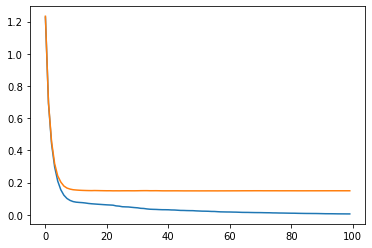

In [205]:
plt.plot(clf.evals_result_['validation_0']['rmsle'])
plt.plot(clf.evals_result_['validation_1']['rmsle'])

In [208]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBlt_grouped
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,0,80.0,11622,1,0,0,0,1,0,...,0,0,1,0,0,6,2010,5,4,1
1462,20,1,81.0,14267,1,0,1,0,1,3,...,0,0,0,2,12500,6,2010,5,4,1
1463,60,1,74.0,13830,1,0,1,0,1,0,...,0,0,1,0,0,1,2010,5,4,11
1464,60,1,78.0,9978,1,0,1,0,1,0,...,0,0,0,0,0,6,2010,5,4,11
1465,120,1,43.0,5005,1,0,1,1,1,0,...,0,0,0,0,0,1,2010,5,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1,21.0,1936,1,0,0,0,1,0,...,0,0,0,0,0,6,2006,5,4,1
2916,160,1,21.0,1894,1,0,0,0,1,0,...,0,0,0,0,0,3,2006,5,2,1
2917,20,1,160.0,20000,1,0,0,0,1,0,...,0,0,0,0,0,9,2006,5,2,1


In [260]:
from sklearn.ensemble import VotingRegressor
ensemble_lin_rbf=VotingRegressor(estimators=[( 'RFR', RandomForestRegressor(random_state=None, n_estimators=1000)),
                                               ('XGB', gd.best_estimator_)],
                                      ).fit(X_train1,y_train1)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_validation,y_validation))


The accuracy for ensembled model is: 0.8508969814124729


In [261]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_validation, ensemble_lin_rbf.predict(X_validation)))

0.14044450010976192

In [224]:
pd.DataFrame({'Id':X_test.index, 'SalePrice':ensemble_lin_rbf.predict(X_test)}).to_csv('house_result.csv', index=False)